# Day 42 - Principal Component Analysis (PCA)

## Introduction to Principal Component Analysis

Principal Component Analysis (PCA) is one of the most widely used dimensionality reduction techniques in machine learning and data science. It transforms high-dimensional data into a lower-dimensional representation while preserving as much of the data's variation as possible. This makes PCA invaluable for visualization, noise reduction, and improving the efficiency of machine learning algorithms.

Imagine you have a dataset with hundreds or thousands of features. While more features might seem better, they can lead to several problems: increased computational cost, difficulty in visualization, and the "curse of dimensionality" where models become less effective as dimensions increase. PCA helps address these challenges by identifying the most important directions (principal components) in your data.

### Why PCA Matters in Machine Learning

PCA is crucial for several reasons:

1. **Dimensionality Reduction**: Reduces the number of features while retaining most of the information, making models faster and often more accurate.
2. **Data Visualization**: Enables visualization of high-dimensional data by reducing it to 2 or 3 dimensions.
3. **Noise Reduction**: By focusing on principal components with the highest variance, PCA can filter out noise.
4. **Feature Engineering**: Creates new, uncorrelated features that can improve model performance.
5. **Preprocessing**: Removes multicollinearity between features, which is beneficial for many algorithms.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the mathematical foundation of PCA, including covariance matrices, eigenvalues, and eigenvectors
- Implement PCA from scratch and using scikit-learn
- Apply PCA for dimensionality reduction and data visualization
- Interpret principal components and determine the optimal number of components
- Recognize when PCA is appropriate and when it might not be the best choice

## Theoretical Foundation of PCA

### The Curse of Dimensionality

Before diving into PCA, it's important to understand the problem it solves. As the number of features (dimensions) in a dataset increases, the volume of the feature space grows exponentially. This leads to data becoming increasingly sparse, making it difficult for machine learning algorithms to find patterns. This phenomenon is known as the **curse of dimensionality**.

Additionally, many features in real-world datasets are correlated or redundant. PCA helps by identifying and removing this redundancy.

### What Are Principal Components?

Principal components are new variables constructed as linear combinations of the original features. They are ordered by the amount of variance they explain:

- The **first principal component (PC1)** captures the direction of maximum variance in the data
- The **second principal component (PC2)** captures the maximum remaining variance, orthogonal to PC1
- This continues for all subsequent components

Mathematically, if we have original features $X_1, X_2, ..., X_p$, the first principal component is:

$$PC_1 = w_{11}X_1 + w_{12}X_2 + ... + w_{1p}X_p$$

where $w_{1j}$ are the weights (loadings) that maximize the variance of $PC_1$.

### Mathematical Foundation

#### Covariance Matrix

The covariance matrix is central to PCA. For a dataset with $p$ features, the covariance matrix $\Sigma$ is a $p \times p$ matrix where each element represents the covariance between two features:

$$\Sigma = \frac{1}{n-1}(X - \bar{X})^T(X - \bar{X})$$

where:
- $X$ is the data matrix (n samples × p features)
- $\bar{X}$ is the mean of each feature
- $n$ is the number of samples

The diagonal elements of $\Sigma$ represent the variance of each feature, while off-diagonal elements represent covariances between features.

#### Eigenvalues and Eigenvectors

PCA finds the eigenvalues and eigenvectors of the covariance matrix. An eigenvector $v$ and eigenvalue $\lambda$ satisfy:

$$\Sigma v = \lambda v$$

- **Eigenvectors** define the directions of the principal components
- **Eigenvalues** indicate the amount of variance explained by each principal component

The eigenvector with the largest eigenvalue is the first principal component, the eigenvector with the second largest eigenvalue is the second principal component, and so on.

#### Variance Explained

The proportion of variance explained by the $k$-th principal component is:

$$\text{Variance Ratio}_k = \frac{\lambda_k}{\sum_{i=1}^{p}\lambda_i}$$

The cumulative explained variance helps determine how many components to retain:

$$\text{Cumulative Variance} = \frac{\sum_{i=1}^{k}\lambda_i}{\sum_{i=1}^{p}\lambda_i}$$

Typically, we retain enough components to explain 80-95% of the total variance.

### PCA Algorithm Steps

1. **Standardize the data**: Center the data by subtracting the mean (and optionally scale to unit variance)
2. **Compute the covariance matrix**: Calculate the covariance between all pairs of features
3. **Calculate eigenvalues and eigenvectors**: Decompose the covariance matrix
4. **Sort eigenvectors**: Order them by decreasing eigenvalues
5. **Select top k eigenvectors**: Choose the number of components to retain
6. **Transform the data**: Project the original data onto the new principal component space

## Python Implementation

Let's start by importing the necessary libraries for our PCA implementation and analysis.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer, make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Simple 2D Example: Understanding PCA Visually

Let's start with a simple 2D example to visualize how PCA identifies principal components. We'll generate correlated 2D data and show how PCA finds the directions of maximum variance.

In [2]:
# Generate correlated 2D data
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # Covariance matrix with correlation
n_samples = 300

# Generate random data
X_2d = np.random.multivariate_normal(mean, cov, n_samples)

# Perform PCA
pca_2d = PCA(n_components=2)
X_2d_pca = pca_2d.fit_transform(X_2d)

# Get the principal components (eigenvectors) and their variance (eigenvalues)
components = pca_2d.components_
explained_variance = pca_2d.explained_variance_

print("Principal Components (Eigenvectors):")
print(components)
print("\nExplained Variance (Eigenvalues):")
print(explained_variance)
print("\nVariance Ratio:")
print(pca_2d.explained_variance_ratio_)
print(f"\nFirst component explains {pca_2d.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"Second component explains {pca_2d.explained_variance_ratio_[1]*100:.2f}% of variance")

Principal Components (Eigenvectors):
[[ 0.79101884  0.61179178]
 [-0.61179178  0.79101884]]

Explained Variance (Eigenvalues):
[4.37459837 0.40962874]

Variance Ratio:
[0.91437933 0.08562067]

First component explains 91.44% of variance
Second component explains 8.56% of variance


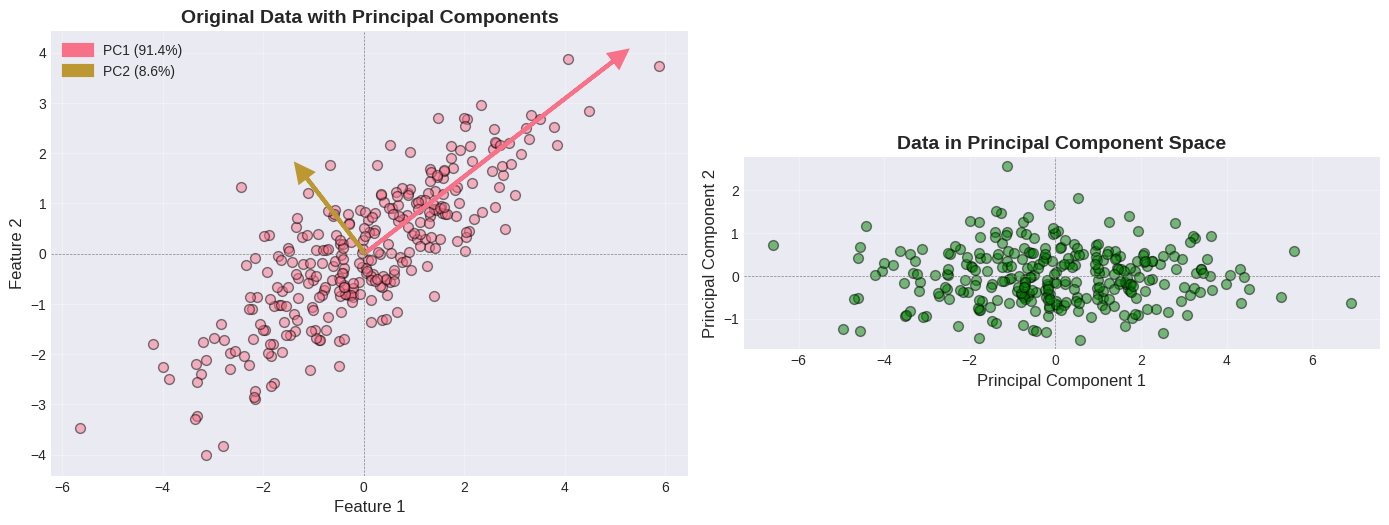


Note: The principal components are orthogonal (perpendicular) to each other.
PC1 points in the direction of maximum variance.
After transformation, the data is rotated so PC1 aligns with the x-axis.


In [3]:
# Visualize the original data and principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Original data with principal component vectors
ax1.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, edgecolors='k', s=50)
ax1.set_xlabel('Feature 1', fontsize=12)
ax1.set_ylabel('Feature 2', fontsize=12)
ax1.set_title('Original Data with Principal Components', fontsize=14, fontweight='bold')
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax1.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax1.grid(True, alpha=0.3)

# Draw principal component vectors
mean_point = X_2d.mean(axis=0)
for i, (comp, var) in enumerate(zip(components, explained_variance)):
    # Scale the vectors by their explained variance for visibility
    vec = comp * 3 * np.sqrt(var)
    ax1.arrow(mean_point[0], mean_point[1], vec[0], vec[1], 
             head_width=0.3, head_length=0.3, fc=f'C{i}', ec=f'C{i}', linewidth=3,
             label=f'PC{i+1} ({pca_2d.explained_variance_ratio_[i]*100:.1f}%)')

ax1.legend(fontsize=10)
ax1.set_aspect('equal')

# Plot 2: Transformed data in PC space
ax2.scatter(X_2d_pca[:, 0], X_2d_pca[:, 1], alpha=0.5, edgecolors='k', s=50, c='green')
ax2.set_xlabel('Principal Component 1', fontsize=12)
ax2.set_ylabel('Principal Component 2', fontsize=12)
ax2.set_title('Data in Principal Component Space', fontsize=14, fontweight='bold')
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nNote: The principal components are orthogonal (perpendicular) to each other.")
print("PC1 points in the direction of maximum variance.")
print("After transformation, the data is rotated so PC1 aligns with the x-axis.")

## Real-World Example: Iris Dataset

Now let's apply PCA to a real dataset. The Iris dataset has 4 features, which we can reduce to 2 or 3 dimensions for visualization. This is one of the most common uses of PCA: making high-dimensional data visualizable.

In [4]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier visualization
iris_df = pd.DataFrame(X_iris, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y_iris]

print("Iris Dataset Shape:", X_iris.shape)
print("\nFirst 5 rows:")
print(iris_df.head())
print("\nDataset Statistics:")
print(iris_df.describe())

Iris Dataset Shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000  

### Importance of Standardization

Before applying PCA, it's crucial to standardize the features (mean=0, variance=1). This is because PCA is sensitive to the scale of features. Features with larger scales will dominate the principal components if we don't standardize.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print("Original data - Mean and Std:")
print(f"Mean: {X_iris.mean(axis=0)}")
print(f"Std: {X_iris.std(axis=0)}")

print("\nScaled data - Mean and Std:")
print(f"Mean: {X_iris_scaled.mean(axis=0)}")
print(f"Std: {X_iris_scaled.std(axis=0)}")

Original data - Mean and Std:
Mean: [5.84333333 3.05733333 3.758      1.19933333]
Std: [0.82530129 0.43441097 1.75940407 0.75969263]

Scaled data - Mean and Std:
Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std: [1. 1. 1. 1.]


In [6]:
# Apply PCA to reduce to 2 components for visualization
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_iris_pca, columns=['PC1', 'PC2'])
pca_df['species'] = [target_names[i] for i in y_iris]

print("Explained Variance Ratio:", pca_iris.explained_variance_ratio_)
print(f"\nTotal Variance Explained: {pca_iris.explained_variance_ratio_.sum()*100:.2f}%")
print(f"PC1 explains: {pca_iris.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2 explains: {pca_iris.explained_variance_ratio_[1]*100:.2f}%")

print("\nPrincipal Components (loadings):")
components_df = pd.DataFrame(
    pca_iris.components_,
    columns=feature_names,
    index=['PC1', 'PC2']
)
print(components_df)

Explained Variance Ratio: [0.72962445 0.22850762]

Total Variance Explained: 95.81%
PC1 explains: 72.96%
PC2 explains: 22.85%

Principal Components (loadings):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942


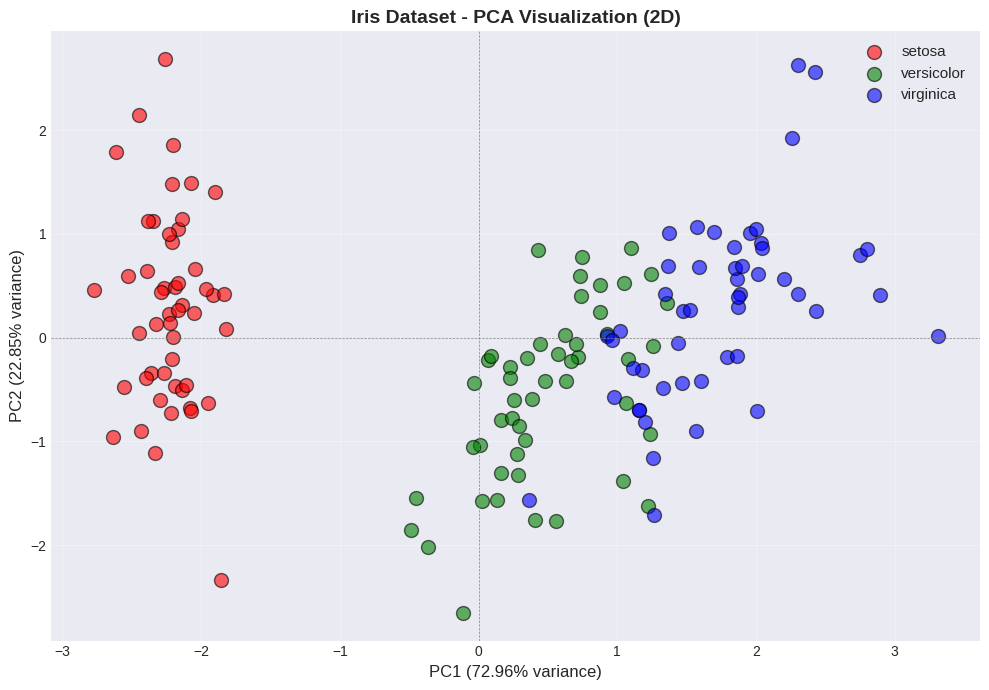


Observation: The three species are well-separated in the 2D PCA space,
even though we reduced from 4 dimensions to 2!


In [7]:
# Visualize the PCA results
plt.figure(figsize=(10, 7))

colors = ['red', 'green', 'blue']
for species, color in zip(target_names, colors):
    mask = pca_df['species'] == species
    plt.scatter(pca_df.loc[mask, 'PC1'], 
               pca_df.loc[mask, 'PC2'],
               c=color, 
               label=species,
               alpha=0.6,
               edgecolors='k',
               s=100)

plt.xlabel(f'PC1 ({pca_iris.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_iris.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
plt.title('Iris Dataset - PCA Visualization (2D)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nObservation: The three species are well-separated in the 2D PCA space,")
print("even though we reduced from 4 dimensions to 2!")

## Determining the Optimal Number of Components

A key question in PCA is: how many components should we keep? We can use a **scree plot** to visualize the explained variance for each component and a **cumulative explained variance plot** to see how many components we need to capture a desired percentage of variance (typically 80-95%).

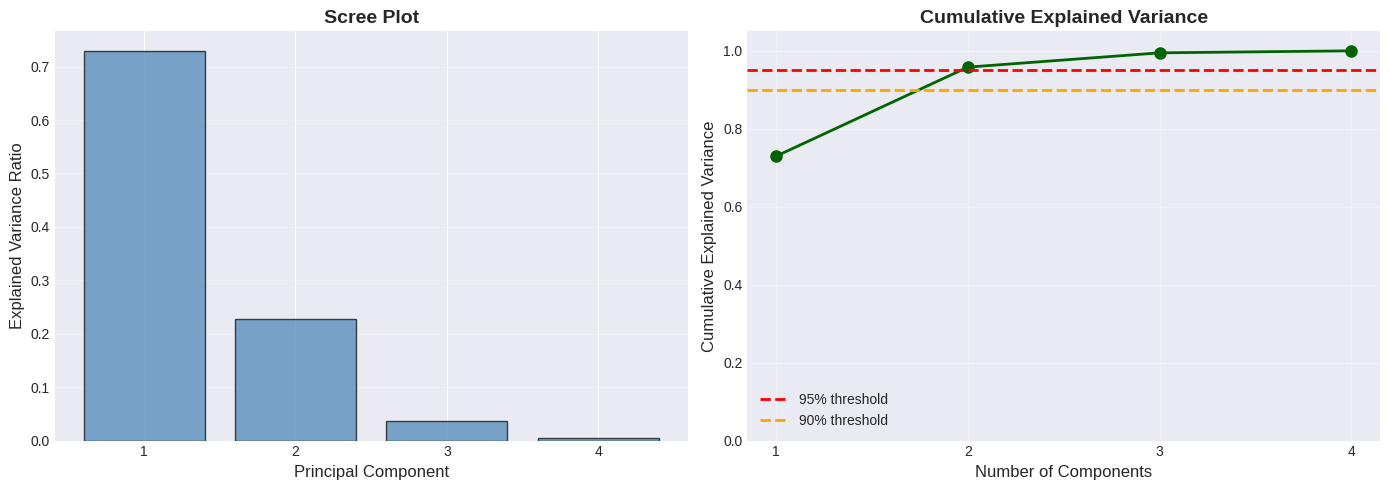

Cumulative Explained Variance:
  1 component(s): 72.96%
  2 component(s): 95.81%
  3 component(s): 99.48%
  4 component(s): 100.00%

Number of components needed for 95% variance: 2


In [8]:
# Perform PCA with all components
pca_full = PCA()
pca_full.fit(X_iris_scaled)

# Create scree plot and cumulative variance plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue',
        edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot', fontsize=14, fontweight='bold')
ax1.set_xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)
ax2.plot(range(1, len(cumsum_variance) + 1),
         cumsum_variance,
         marker='o',
         linestyle='-',
         linewidth=2,
         markersize=8,
         color='darkgreen')
ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% threshold')
ax2.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% threshold')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, len(cumsum_variance) + 1))
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("Cumulative Explained Variance:")
for i, var in enumerate(cumsum_variance):
    print(f"  {i+1} component(s): {var*100:.2f}%")

# Find number of components for 95% variance
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

## Practical Application: Breast Cancer Dataset

Let's apply PCA to a more complex dataset with 30 features. The Breast Cancer Wisconsin dataset contains 30 numerical features computed from digitized images of breast mass. We'll use PCA to reduce dimensionality and visualize the data.

In [9]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
cancer_feature_names = cancer.feature_names
cancer_target_names = cancer.target_names

print(f"Dataset shape: {X_cancer.shape}")
print(f"Number of features: {X_cancer.shape[1]}")
print(f"Number of samples: {X_cancer.shape[0]}")
print(f"\nTarget classes: {cancer_target_names}")
print(f"Class distribution: Malignant={np.sum(y_cancer==0)}, Benign={np.sum(y_cancer==1)}")

# Show feature names
print("\nFeature names (first 10):")
for i, name in enumerate(cancer_feature_names[:10]):
    print(f"  {i+1}. {name}")
print("  ...")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569

Target classes: ['malignant' 'benign']
Class distribution: Malignant=212, Benign=357

Feature names (first 10):
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension
  ...


In [10]:
# Standardize the features
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# Apply PCA with different numbers of components
pca_cancer_2 = PCA(n_components=2)
X_cancer_pca_2 = pca_cancer_2.fit_transform(X_cancer_scaled)

pca_cancer_3 = PCA(n_components=3)
X_cancer_pca_3 = pca_cancer_3.fit_transform(X_cancer_scaled)

print("2 Components:")
print(f"  Explained variance: {pca_cancer_2.explained_variance_ratio_.sum()*100:.2f}%")
print(f"  PC1: {pca_cancer_2.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca_cancer_2.explained_variance_ratio_[1]*100:.2f}%")

print("\n3 Components:")
print(f"  Explained variance: {pca_cancer_3.explained_variance_ratio_.sum()*100:.2f}%")
print(f"  PC1: {pca_cancer_3.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca_cancer_3.explained_variance_ratio_[1]*100:.2f}%")
print(f"  PC3: {pca_cancer_3.explained_variance_ratio_[2]*100:.2f}%")

2 Components:
  Explained variance: 63.24%
  PC1: 44.27%
  PC2: 18.97%

3 Components:
  Explained variance: 72.64%
  PC1: 44.27%
  PC2: 18.97%
  PC3: 9.39%


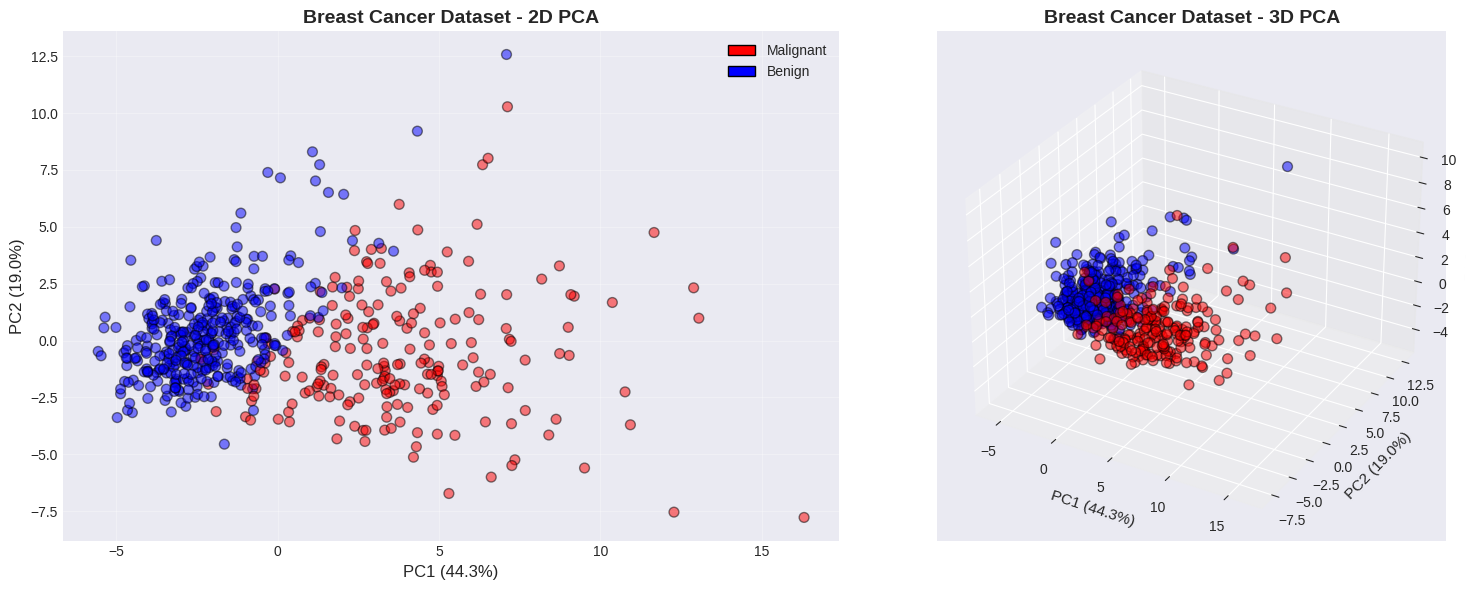


Observation: Even though we reduced from 30 dimensions to 2-3,
we can still see separation between malignant and benign tumors!


In [11]:
# Visualize in 2D and 3D
fig = plt.figure(figsize=(16, 6))

# 2D Plot
ax1 = fig.add_subplot(121)
colors_cancer = ['red' if label == 0 else 'blue' for label in y_cancer]
ax1.scatter(X_cancer_pca_2[:, 0], X_cancer_pca_2[:, 1], 
           c=colors_cancer, alpha=0.5, edgecolors='k', s=50)
ax1.set_xlabel(f'PC1 ({pca_cancer_2.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca_cancer_2.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax1.set_title('Breast Cancer Dataset - 2D PCA', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='k', label='Malignant'),
                  Patch(facecolor='blue', edgecolor='k', label='Benign')]
ax1.legend(handles=legend_elements, fontsize=10)

# 3D Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_cancer_pca_3[:, 0], X_cancer_pca_3[:, 1], X_cancer_pca_3[:, 2],
           c=colors_cancer, alpha=0.5, edgecolors='k', s=50)
ax2.set_xlabel(f'PC1 ({pca_cancer_3.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax2.set_ylabel(f'PC2 ({pca_cancer_3.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax2.set_zlabel(f'PC3 ({pca_cancer_3.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax2.set_title('Breast Cancer Dataset - 3D PCA', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nObservation: Even though we reduced from 30 dimensions to 2-3,")
print("we can still see separation between malignant and benign tumors!")

## Interpreting Principal Components

Principal components are linear combinations of the original features. The loadings (coefficients) tell us which original features contribute most to each principal component. Let's examine the loadings for the breast cancer dataset.

In [12]:
# Create a DataFrame of component loadings
loadings_df = pd.DataFrame(
    pca_cancer_3.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=cancer_feature_names
)

print("Top 10 features by absolute loading on PC1:")
print(loadings_df['PC1'].abs().sort_values(ascending=False).head(10))

print("\nLoadings for first 5 features:")
print(loadings_df.head())

Top 10 features by absolute loading on PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
worst concavity         0.228768
worst radius            0.227997
mean perimeter          0.227537
worst area              0.224871
mean area               0.220995
Name: PC1, dtype: float64

Loadings for first 5 features:
                      PC1       PC2       PC3
mean radius      0.218902 -0.233857 -0.008531
mean texture     0.103725 -0.059706  0.064550
mean perimeter   0.227537 -0.215181 -0.009314
mean area        0.220995 -0.231077  0.028700
mean smoothness  0.142590  0.186113 -0.104292


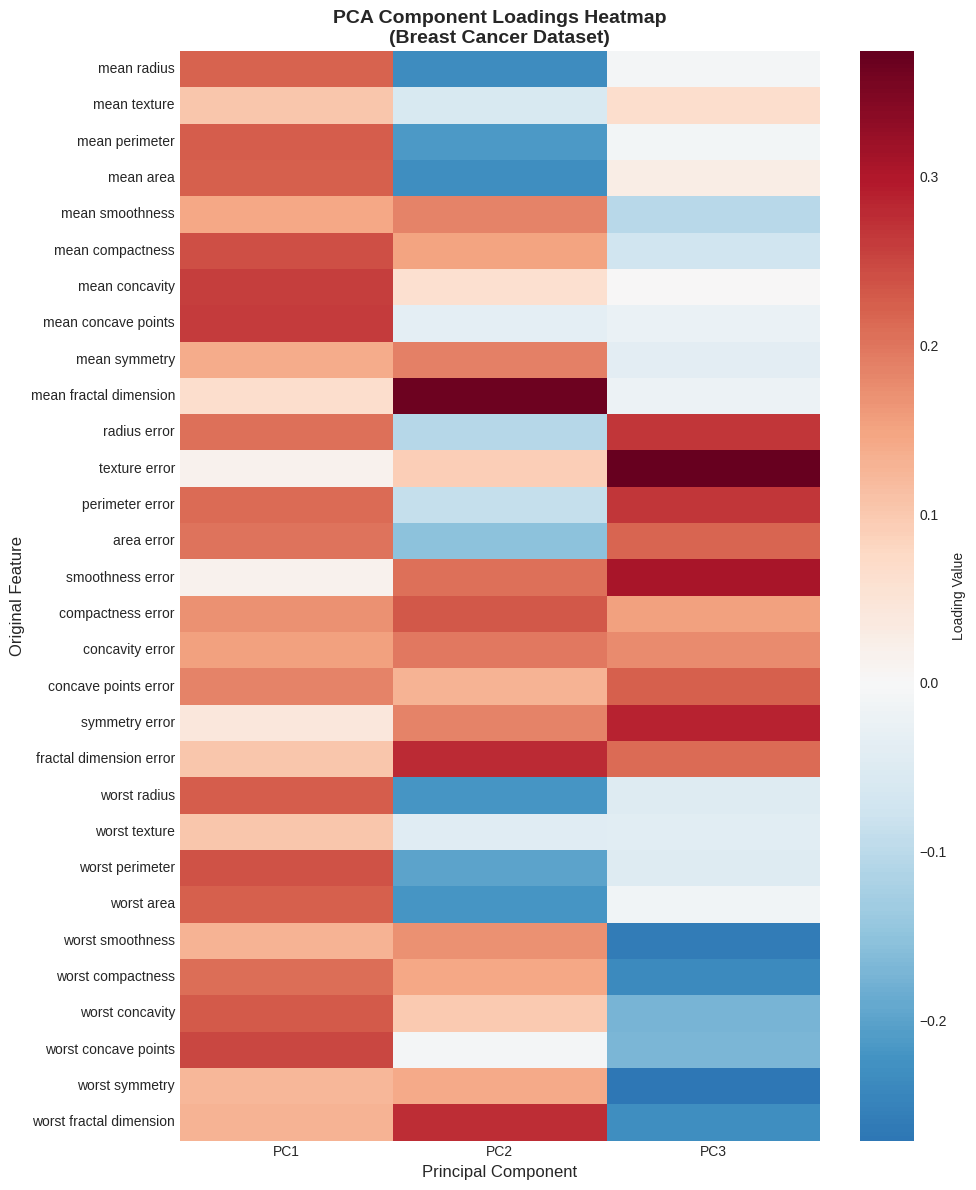


Interpretation: Darker colors (red/blue) indicate stronger contributions.
Positive (red) and negative (blue) loadings have equal importance.


In [13]:
# Visualize loadings as a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(loadings_df, cmap='RdBu_r', center=0, 
            annot=False, fmt='.2f', 
            cbar_kws={'label': 'Loading Value'})
plt.title('PCA Component Loadings Heatmap\n(Breast Cancer Dataset)', 
         fontsize=14, fontweight='bold')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Original Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation: Darker colors (red/blue) indicate stronger contributions.")
print("Positive (red) and negative (blue) loadings have equal importance.")

## Hands-On Activity: PCA for Image Compression

One interesting application of PCA is image compression. Each image can be thought of as a high-dimensional vector (one dimension per pixel). PCA can reduce the number of dimensions needed to represent the image, effectively compressing it.

Let's create a simple synthetic "image" dataset and demonstrate this concept.

In [14]:
# Generate synthetic image-like data (blobs representing "pixels")
from sklearn.datasets import make_low_rank_matrix

# Create a low-rank matrix simulating correlated "image" data
np.random.seed(42)
n_samples = 200
n_features = 50  # Simulating 50 "pixels"

X_image = make_low_rank_matrix(n_samples=n_samples, 
                               n_features=n_features,
                               effective_rank=10,
                               random_state=42)

print(f"Original data shape: {X_image.shape}")
print(f"Original data size: {X_image.nbytes} bytes")

# Standardize
scaler_image = StandardScaler()
X_image_scaled = scaler_image.fit_transform(X_image)

# Apply PCA with different numbers of components
compression_ratios = []
n_components_list = [5, 10, 20, 30, 40, 50]

for n_comp in n_components_list:
    pca_temp = PCA(n_components=n_comp)
    X_compressed = pca_temp.fit_transform(X_image_scaled)
    
    # Calculate compression ratio
    original_size = X_image.nbytes
    compressed_size = X_compressed.nbytes + pca_temp.components_.nbytes
    compression_ratio = (1 - compressed_size / original_size) * 100
    
    compression_ratios.append({
        'n_components': n_comp,
        'variance_explained': pca_temp.explained_variance_ratio_.sum() * 100,
        'compression_ratio': compression_ratio
    })

compression_df = pd.DataFrame(compression_ratios)
print("\nCompression Analysis:")
print(compression_df.to_string(index=False))

Original data shape: (200, 50)
Original data size: 80000 bytes

Compression Analysis:
 n_components  variance_explained  compression_ratio
            5           31.702967               87.5
           10           53.057006               75.0
           20           72.152558               50.0
           30           83.851335               25.0
           40           92.858437                0.0
           50          100.000000              -25.0


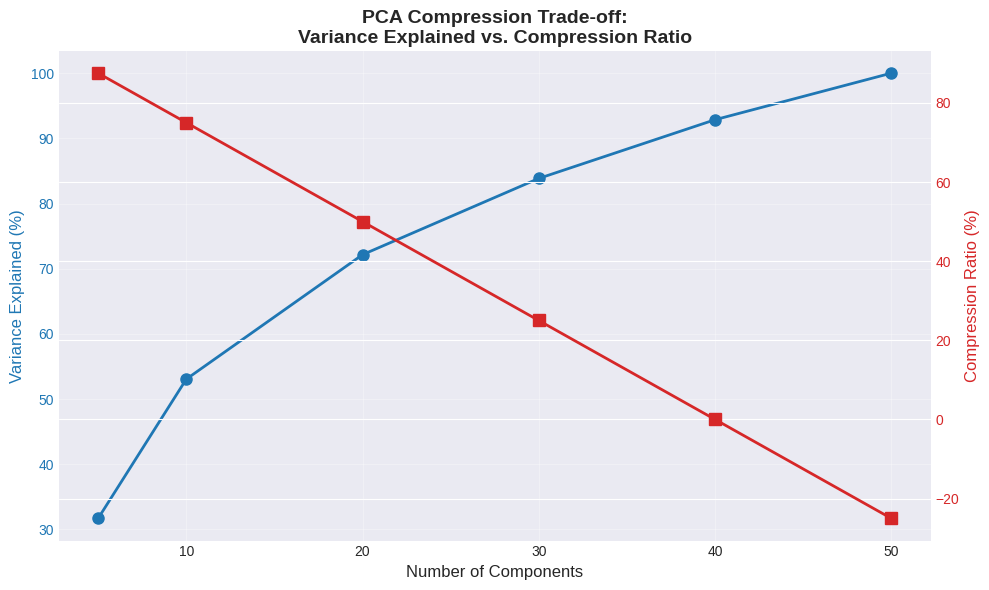


Observation: We can achieve significant compression (size reduction)
while still retaining most of the variance (information) in the data.


In [15]:
# Visualize compression vs. variance explained trade-off
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Components', fontsize=12)
ax1.set_ylabel('Variance Explained (%)', color=color, fontsize=12)
ax1.plot(compression_df['n_components'], compression_df['variance_explained'], 
         marker='o', linewidth=2, markersize=8, color=color, label='Variance Explained')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Compression Ratio (%)', color=color, fontsize=12)
ax2.plot(compression_df['n_components'], compression_df['compression_ratio'], 
         marker='s', linewidth=2, markersize=8, color=color, label='Compression Ratio')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('PCA Compression Trade-off:\nVariance Explained vs. Compression Ratio', 
         fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

print("\nObservation: We can achieve significant compression (size reduction)")
print("while still retaining most of the variance (information) in the data.")

## Reconstruction from PCA

An important property of PCA is that we can reconstruct the original data from the principal components. However, if we use fewer components than the original dimensions, the reconstruction will be approximate. Let's demonstrate this with the Iris dataset.

In [16]:
# Apply PCA with 2 components
pca_reconstruct = PCA(n_components=2)
X_iris_reduced = pca_reconstruct.fit_transform(X_iris_scaled)

# Reconstruct the original data
X_iris_reconstructed = pca_reconstruct.inverse_transform(X_iris_reduced)

# Calculate reconstruction error
reconstruction_error = np.mean((X_iris_scaled - X_iris_reconstructed) ** 2)

print(f"Reconstruction Error (MSE): {reconstruction_error:.6f}")
print(f"\nOriginal data shape: {X_iris_scaled.shape}")
print(f"Reduced data shape: {X_iris_reduced.shape}")
print(f"Reconstructed data shape: {X_iris_reconstructed.shape}")

# Compare original vs reconstructed for first sample
print("\nFirst sample comparison:")
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Original (scaled)': X_iris_scaled[0],
    'Reconstructed': X_iris_reconstructed[0],
    'Difference': X_iris_scaled[0] - X_iris_reconstructed[0]
})
print(comparison_df)

Reconstruction Error (MSE): 0.041868

Original data shape: (150, 4)
Reduced data shape: (150, 2)
Reconstructed data shape: (150, 4)

First sample comparison:
             Feature  Original (scaled)  Reconstructed  Difference
0  sepal length (cm)          -0.900681      -0.998889    0.098208
1   sepal width (cm)           1.019004       1.053198   -0.034194
2  petal length (cm)          -1.340227      -1.302707   -0.037520
3   petal width (cm)          -1.315444      -1.247098   -0.068346


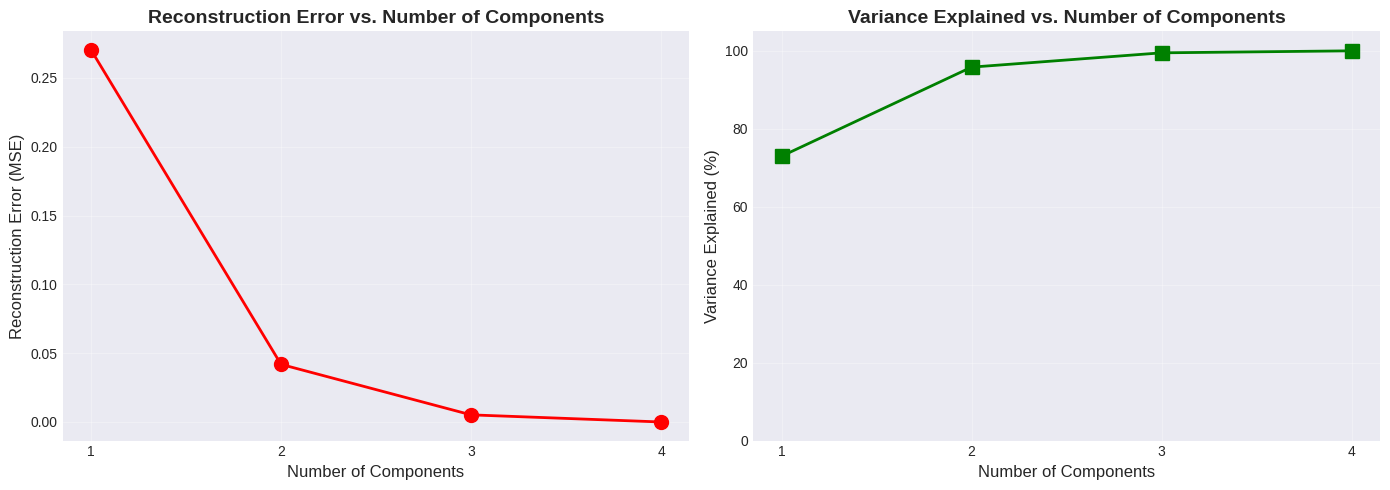


Observation: As we increase the number of components,
reconstruction error decreases and variance explained increases.
With all 4 components, reconstruction is perfect (error ≈ 0).


In [17]:
# Visualize reconstruction error across different numbers of components
n_components_range = range(1, 5)
reconstruction_errors = []
variance_explained = []

for n_comp in n_components_range:
    pca_temp = PCA(n_components=n_comp)
    X_reduced = pca_temp.fit_transform(X_iris_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_reduced)
    error = np.mean((X_iris_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(error)
    variance_explained.append(pca_temp.explained_variance_ratio_.sum() * 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Reconstruction error plot
ax1.plot(n_components_range, reconstruction_errors, 
        marker='o', linewidth=2, markersize=10, color='red')
ax1.set_xlabel('Number of Components', fontsize=12)
ax1.set_ylabel('Reconstruction Error (MSE)', fontsize=12)
ax1.set_title('Reconstruction Error vs. Number of Components', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(n_components_range)

# Variance explained plot
ax2.plot(n_components_range, variance_explained, 
        marker='s', linewidth=2, markersize=10, color='green')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Variance Explained (%)', fontsize=12)
ax2.set_title('Variance Explained vs. Number of Components', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(n_components_range)
ax2.set_ylim([0, 105])

plt.tight_layout()
plt.show()

print("\nObservation: As we increase the number of components,")
print("reconstruction error decreases and variance explained increases.")
print("With all 4 components, reconstruction is perfect (error ≈ 0).")

## When to Use PCA (and When Not To)

### When PCA is Appropriate:

1. **High-dimensional data**: When you have many features and want to reduce complexity
2. **Visualization**: When you need to visualize high-dimensional data in 2D or 3D
3. **Noise reduction**: When data contains noise that affects all features
4. **Speed up algorithms**: When training time is too long due to high dimensionality
5. **Multicollinearity**: When features are highly correlated
6. **Linear relationships**: When features have linear relationships

### When PCA May Not Be Appropriate:

1. **Non-linear relationships**: PCA is linear; consider kernel PCA or other methods for non-linear data
2. **Interpretability is crucial**: Principal components are combinations of features, making interpretation difficult
3. **Small datasets**: With few features, dimensionality reduction may not be necessary
4. **Features on different scales not standardized**: PCA is sensitive to feature scales
5. **Class separation matters**: PCA ignores class labels; consider LDA for supervised dimensionality reduction

### PCA Assumptions:

- Linearity: Assumes linear combinations of features capture variance
- Large variance implies importance: Assumes directions with large variance are most informative
- Orthogonality: Principal components are perpendicular to each other
- Mean and variance are sufficient statistics: Assumes data can be characterized by these statistics

## Key Takeaways

Congratulations! You've learned about Principal Component Analysis. Here are the key points to remember:

- **PCA reduces dimensionality** by transforming data into principal components that capture maximum variance
- **Principal components are orthogonal** linear combinations of original features, ordered by explained variance
- **Eigenvalues and eigenvectors** of the covariance matrix are central to PCA's mathematical foundation
- **Standardization is crucial** before applying PCA to prevent features with larger scales from dominating
- **Scree plots and cumulative variance** help determine the optimal number of components to retain
- **PCA enables visualization** of high-dimensional data by reducing it to 2 or 3 dimensions
- **Applications include** compression, noise reduction, speeding up algorithms, and exploratory data analysis
- **PCA is unsupervised** and doesn't use class labels, making it suitable for exploratory analysis but potentially suboptimal for classification tasks
- **Component loadings reveal** which original features contribute most to each principal component
- **Data can be reconstructed** from principal components, with reconstruction error decreasing as more components are used

### What You Can Now Do:

- Apply PCA to reduce the dimensionality of high-dimensional datasets
- Visualize complex datasets in 2D or 3D using PCA
- Determine the appropriate number of components for your specific use case
- Interpret principal components and understand their relationship to original features
- Use PCA as a preprocessing step to improve machine learning model performance
- Recognize when PCA is appropriate and when alternative methods might be better

## Further Resources

To deepen your understanding of PCA and dimensionality reduction, explore these resources:

1. **Scikit-learn PCA Documentation**: Comprehensive guide to PCA implementation in scikit-learn  
   https://scikit-learn.org/stable/modules/decomposition.html#pca

2. **StatQuest Video on PCA**: Excellent visual explanation of PCA concepts  
   https://www.youtube.com/watch?v=FgakZw6K1QQ

3. **A Tutorial on Principal Component Analysis** by Jonathon Shlens: Detailed mathematical treatment  
   https://arxiv.org/abs/1404.1100

4. **Python Data Science Handbook** by Jake VanderPlas: Chapter on PCA with practical examples  
   https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

5. **Kernel PCA**: Learn about non-linear dimensionality reduction  
   https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

6. **Incremental PCA**: For datasets too large to fit in memory  
   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html

### Practice Exercises:

1. Apply PCA to the MNIST digits dataset and visualize different digit classes in 2D
2. Compare PCA with other dimensionality reduction techniques (t-SNE, LDA, autoencoders)
3. Use PCA for feature extraction before training a classifier and compare performance with using all original features
4. Implement PCA from scratch using NumPy to deepen your understanding of the algorithm
5. Explore kernel PCA for non-linear dimensionality reduction on a dataset with non-linear patterns